# 참고) 원본데이터_여성의류 시각화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 

sns.set_style(style='white')
sns.set_context(context ='paper')

pd.set_option('max_columns',50)
pd.set_option('max_rows',500)

font_path = 'c:/Windows/Fonts/NanumSquareRoundR.ttf'
fontprop = font_manager.FontProperties(fname=font_path)

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
# 원본 데이터
product=pd.read_csv('data/Product.csv')
search1=pd.read_csv('data/Search1.csv')
search2=pd.read_csv('data/Search2.csv')
session=pd.read_csv('data/Session.csv')
custom=pd.read_csv('data/Custom.csv')
master=pd.read_csv('data/Master.csv')

C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# int 로 만들기
def str_to_int(x):
    if type(x) == str:
        return int(''.join(x.split(',')))
    else: return x

product['PD_BUY_AM'] = product.PD_BUY_AM.map(str_to_int)
session['TOT_SESS_HR_V'] = session.TOT_SESS_HR_V.map(str_to_int)

def for_PD_BUY_CT(x):
    if type(x) == str:
        if ',' in x : 
            return int(''.join(x.split(',')))
        else : 
            return int(x)
    else : 
        return x
    
product['PD_BUY_CT'] = product['PD_BUY_CT'].map(for_PD_BUY_CT)

In [5]:
productmaster=pd.merge(product,master,how='left',on='PD_C')

In [6]:
# 매출 column 생성
productmaster['PD_BUY_TO'] = productmaster['PD_BUY_AM']*productmaster['PD_BUY_CT']

## 왜 주요 상품군 중 여성의류를 택했는가?

온라인 롯데계열에서 가장 많이 팔고 팔리는 상품군으로, 매출 2위인 중요한 상품군이기 때문이다.

In [7]:
# 어떤 제품이 가장 돈을 많이 벌어다 주는가?
sale=productmaster.groupby('CLAC1_NM').sum().reset_index().sort_values('PD_BUY_TO',ascending = False).reset_index(drop = True)

In [8]:
sale.head()

,CLAC1_NM,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_BUY_AM,PD_BUY_CT,PD_BUY_TO
0,패션잡화,1488799476149,2659573523707,35144292,210508329868,44411606709,468806,44870368961
1,여성의류,2260302492600,4021170826087,65223742,230952620528,33835294561,690660,34140463488
2,스포츠패션,1864603584809,3403127382905,47749683,233960113810,28938805997,600924,30148248820
3,화장품/뷰티케어,1910328816062,3243703427189,38354103,302846723056,27109750327,670504,30086830526
4,남성의류,1838920794228,3419718699447,51464135,215465857043,18091175695,580496,18457045085


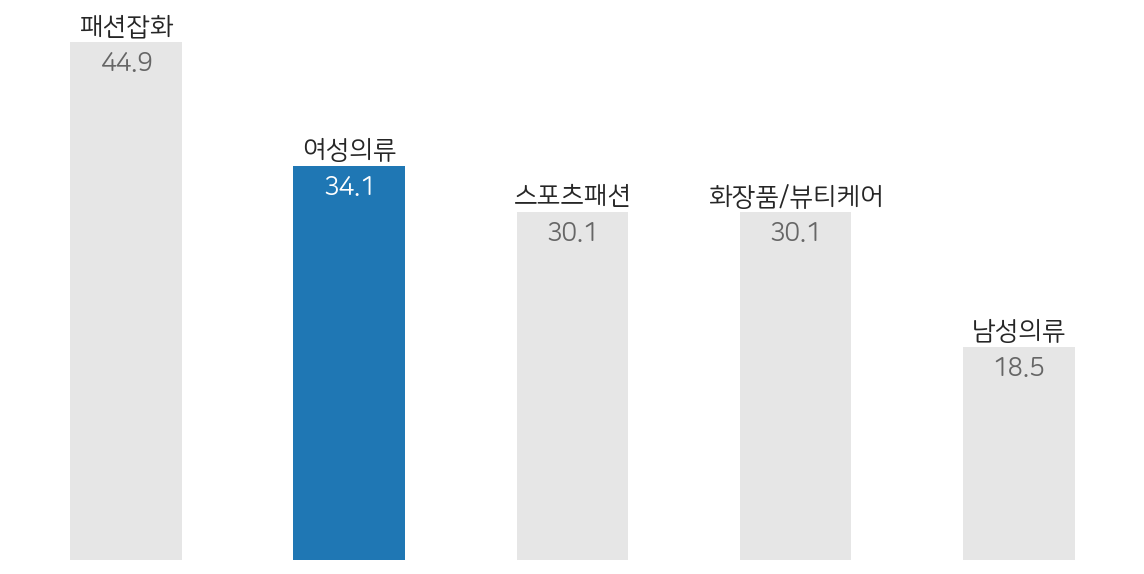

In [34]:
plt.figure(figsize = (10,5))
ax = sale.PD_BUY_TO[:5].plot.bar(color = [['0.9', '#1f77b4', '0.9', '0.9', '0.9']])
sns.despine(left = True, bottom = True)
ax.set_xticks([])
ax.set_yticks([])
for i in range(len(sale.CLAC1_NM[:5])):
    plt.text(i,sale.PD_BUY_TO[:10][i]+650000000,sale.CLAC1_NM[:10][i], fontproperties = fontprop, fontsize = 13,
            horizontalalignment = 'center')

colors = ['0.4','w','0.4','0.4','0.4']
for i in range(len(sale.CLAC1_NM[:5])):
    plt.text(i,sale.PD_BUY_TO[:10][i]-2500000000,round(sale.PD_BUY_TO[:10][i]/1000000000,1), fontproperties = fontprop, fontsize = 13,
            horizontalalignment = 'center', color = colors[i])
plt.show()

# 단위 : 10억

In [21]:
# 각 상품군의 판매 종류는?
selling=master.groupby('CLAC1_NM').count()
selling=selling.reset_index().sort_values(by='PD_C', ascending = False).reset_index(drop = True)

In [80]:
selling.head(1)

,CLAC1_NM,PD_C,PD_NM,CLAC2_NM,CLAC3_NM
0,여성의류,181107,181107,181107,181107


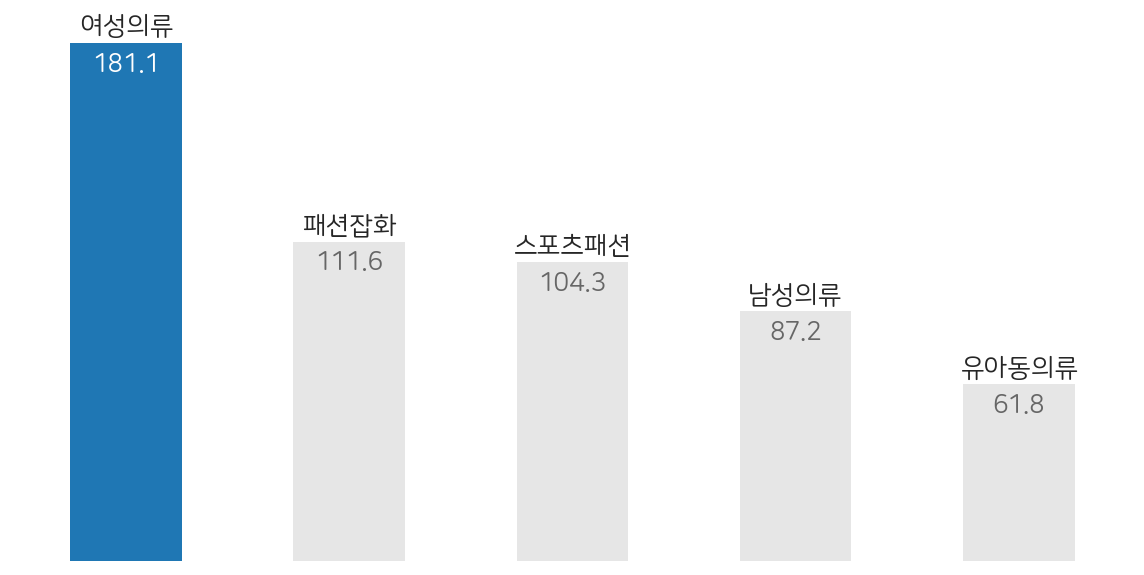

In [33]:
plt.figure(figsize = (10,5))
ax = selling.PD_C[:5].plot.bar(color = [['#1f77b4', '0.9' , '0.9', '0.9', '0.9']])
sns.despine(left = True, bottom = True)
ax.set_xticks([])
ax.set_yticks([])
for i in range(len(selling.PD_C[:5])):
    plt.text(i,selling.PD_C[:5][i]+3000,selling.CLAC1_NM[:5][i], fontproperties = fontprop, fontsize = 13,
            horizontalalignment = 'center')

colors = ['w','0.4','0.4','0.4','0.4']
for i in range(len(sale.CLAC1_NM[:5])):
    plt.text(i,selling.PD_C[:5][i]-10000,round(selling.PD_C[:5][i]/1000,1), fontproperties = fontprop, fontsize = 13,
            horizontalalignment = 'center', color = colors[i])
plt.show()

# 단위 : 천개

In [23]:
# 어떤 상품군이 가장 많이 팔릴까? 상품군의 판매 횟수
sold=productmaster.groupby('CLAC1_NM').count()
sold=sold.reset_index().sort_values(by='PD_C', ascending = False).reset_index(drop = True)

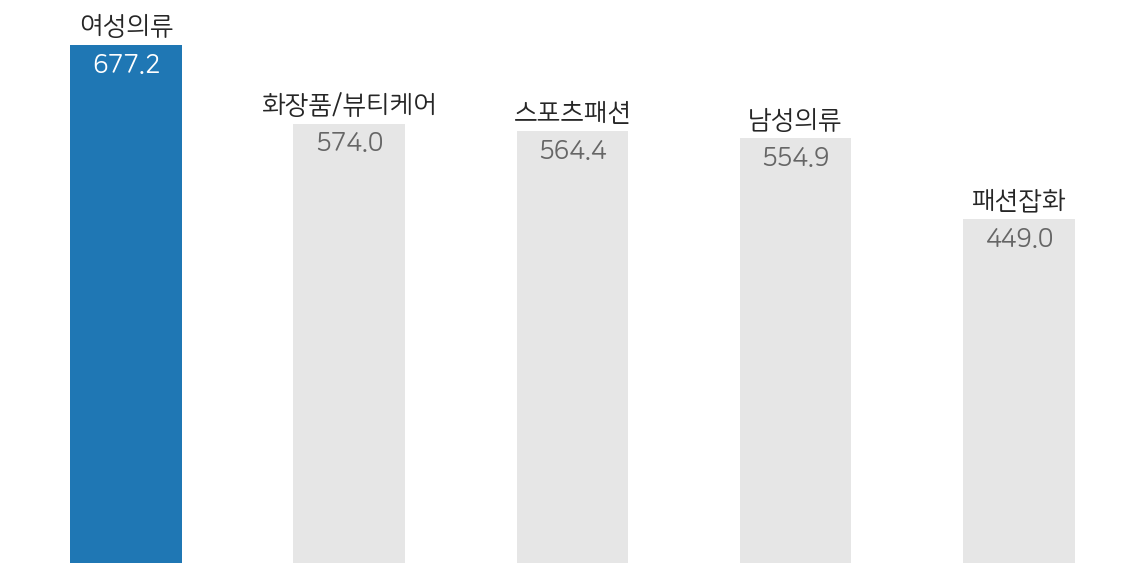

In [32]:
plt.figure(figsize = (10,5))
ax = sold.PD_C[:5].plot.bar(color = [['#1f77b4', '0.9' , '0.9', '0.9', '0.9']])
sns.despine(left = True, bottom = True)
ax.set_xticks([])
ax.set_yticks([])
for i in range(len(sold.PD_C[:5])):
    plt.text(i,sold.PD_C[:5][i]+15000,sold.CLAC1_NM[:5][i], fontproperties = fontprop, fontsize = 13,
            horizontalalignment = 'center')

colors = ['w','0.4','0.4','0.4','0.4']
for i in range(len(sold.CLAC1_NM[:5])):
    plt.text(i,sold.PD_C[:5][i]-35000,round(sold.PD_C[:5][i]/1000,1), fontproperties = fontprop, fontsize = 13,
            horizontalalignment = 'center', color = colors[i])
plt.show()

# 단위 : 천개